#TIM AI Academy

## Demonstração 7 - Dataset para uma Empresa de Telecomunicações

Objetivo: A partir de um dataset artificial, vamos entrar em detalhes a respeito da detecção de outliers, e usar dados de gastos mensais de clientes para entender melhor a respeito das técnicas de IQR e Score Z.

### Prof. Dr. Ahirton Lopes (https://github.com/ahirtonlopes)

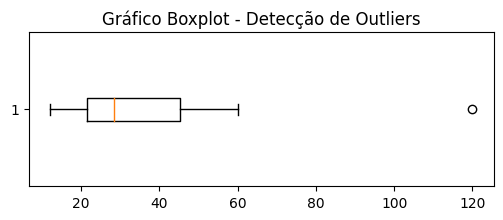

In [28]:
# Importando as bibliotecas necessárias

import matplotlib.pyplot as plt

dados = [12,18,20,22,25,27,30,35,42,55,60,120]

plt.figure(figsize=(6, 2))
plt.boxplot(dados, vert=False)
plt.title('Gráfico Boxplot - Detecção de Outliers')
plt.show()

A detecção de outliers é uma técnica importante para identificar valores que fogem ao padrão geral dos dados. Outliers podem distorcer análises, impactar modelos de Machine Learning e, em muitos casos, representam dados anômalos que requerem atenção especial.

Neste exemplo, vamos demonstrar como o método IQR (Intervalo Interquartil) e o Score Z podem ser utilizados para detectar outliers em um conjunto de dados de gastos mensais de clientes.

In [29]:
# Importando as bibliotecas necessárias

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Gerando um conjunto de dados fictício (Gasto Mensal de Clientes)
np.random.seed(42)
gastos_mensais = np.random.normal(loc=50, scale=15, size=1000)  # Média 50, desvio padrão 15
gastos_mensais = np.append(gastos_mensais, [150, 200, 220])  # Adicionando alguns outliers

In [31]:
# Criando um DataFrame com os dados
df = pd.DataFrame({'GastoMensal': gastos_mensais})

# Exibindo as primeiras linhas do dataset
print(df.head())

   GastoMensal
0    57.450712
1    47.926035
2    59.715328
3    72.845448
4    46.487699


In [32]:

# Calculando os Quartis
Q1 = df['GastoMensal'].quantile(0.25)
Q3 = df['GastoMensal'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites superior e inferior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"\nLimite Inferior: {limite_inferior}")
print(f"Limite Superior: {limite_superior}")


Limite Inferior: 11.137848192381387
Limite Superior: 88.93640023574467


In [33]:
# Detectando os outliers
outliers = df[(df['GastoMensal'] < limite_inferior) | (df['GastoMensal'] > limite_superior)]
print(f"\nOutliers detectados:\n{outliers}")


Outliers detectados:
      GastoMensal
74      10.703823
179     90.802537
209    107.790972
262      1.380990
478     96.183212
646      9.546700
668     10.235453
755     89.485731
1000   150.000000
1001   200.000000
1002   220.000000


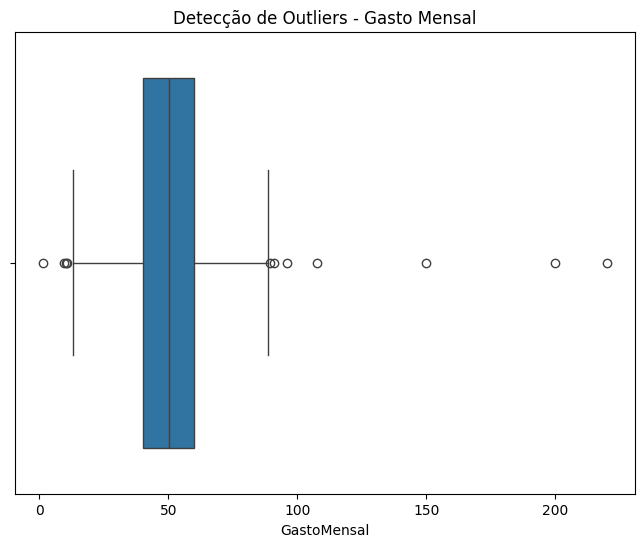

In [34]:
# Visualizando os dados e os outliers com um Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['GastoMensal'])
plt.title('Detecção de Outliers - Gasto Mensal')
plt.show()

Neste exemplo, geramos um dataset fictício com gastos mensais de clientes, adicionando propositalmente alguns outliers.

A visualização através do Boxplot evidencia esses valores anômalos, enquanto a lógica do IQR os identifica programaticamente.

Score Z

O Score Z mede a distância de um valor em relação à média, em termos de desvios-padrão. Um valor com Z-Score maior que 3 ou menor que -3 é geralmente considerado um outlier.

Abaixo, está o código complementar para aplicar o Score Z no mesmo dataset:

In [35]:
from scipy import stats

# Calculando o Z-Score
df['Z_Score'] = stats.zscore(df['GastoMensal'])

# Definindo os outliers (Z-Score maior que 3 ou menor que -3)
outliers_z = df[(df['Z_Score'] > 3) | (df['Z_Score'] < -3)]
print(f"\nOutliers detectados pelo Score Z:\n{outliers_z}")


Outliers detectados pelo Score Z:
      GastoMensal    Z_Score
209    107.790972   3.437974
1000   150.000000   5.980119
1001   200.000000   8.991494
1002   220.000000  10.196045



Média Geral: 50.707857265538266
Média Sem Outliers: 50.27605989698511
Estatística t: -0.9580045286763522, p-valor: 0.3382941288113789


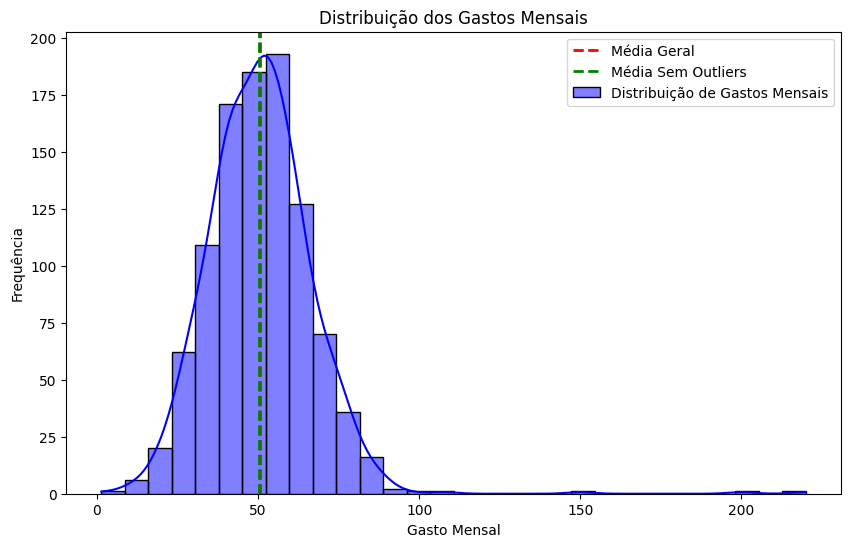

In [39]:
# Cálculo do p-valor
# Teste t de Student: testando se a média dos dados sem outliers é diferente da média geral
media_geral = np.mean(df['GastoMensal'])
dados_sem_outliers = df[(df['GastoMensal'] >= limite_inferior) & (df['GastoMensal'] <= limite_superior)]
media_sem_outliers = np.mean(dados_sem_outliers['GastoMensal'])

# Realizando o teste t
t_statistic, p_value = stats.ttest_1samp(dados_sem_outliers['GastoMensal'], media_geral)

print(f"\nMédia Geral: {media_geral}")
print(f"Média Sem Outliers: {media_sem_outliers}")
print(f"Estatística t: {t_statistic}, p-valor: {p_value}")

# Visualizando a distribuição e a média
plt.figure(figsize=(10, 6))
sns.histplot(df['GastoMensal'], bins=30, kde=True, color='blue', label='Distribuição de Gastos Mensais')
plt.axvline(media_geral, color='red', linestyle='dashed', linewidth=2, label='Média Geral')
plt.axvline(media_sem_outliers, color='green', linestyle='dashed', linewidth=2, label='Média Sem Outliers')

# Adicionando detalhes ao gráfico
plt.title('Distribuição dos Gastos Mensais')
plt.xlabel('Gasto Mensal')
plt.ylabel('Frequência')
plt.legend()
plt.show()